# 🧩 BLOQUE II

## El alquiler como válvula de presión del sistema

### Pregunta clave

> ¿Qué ocurre cuando la gente no puede comprar vivienda?
> 

Respuesta: se vuelca al alquiler → y eso tensiona todo el sistema.

---

## 📊 7. Compra vs alquiler

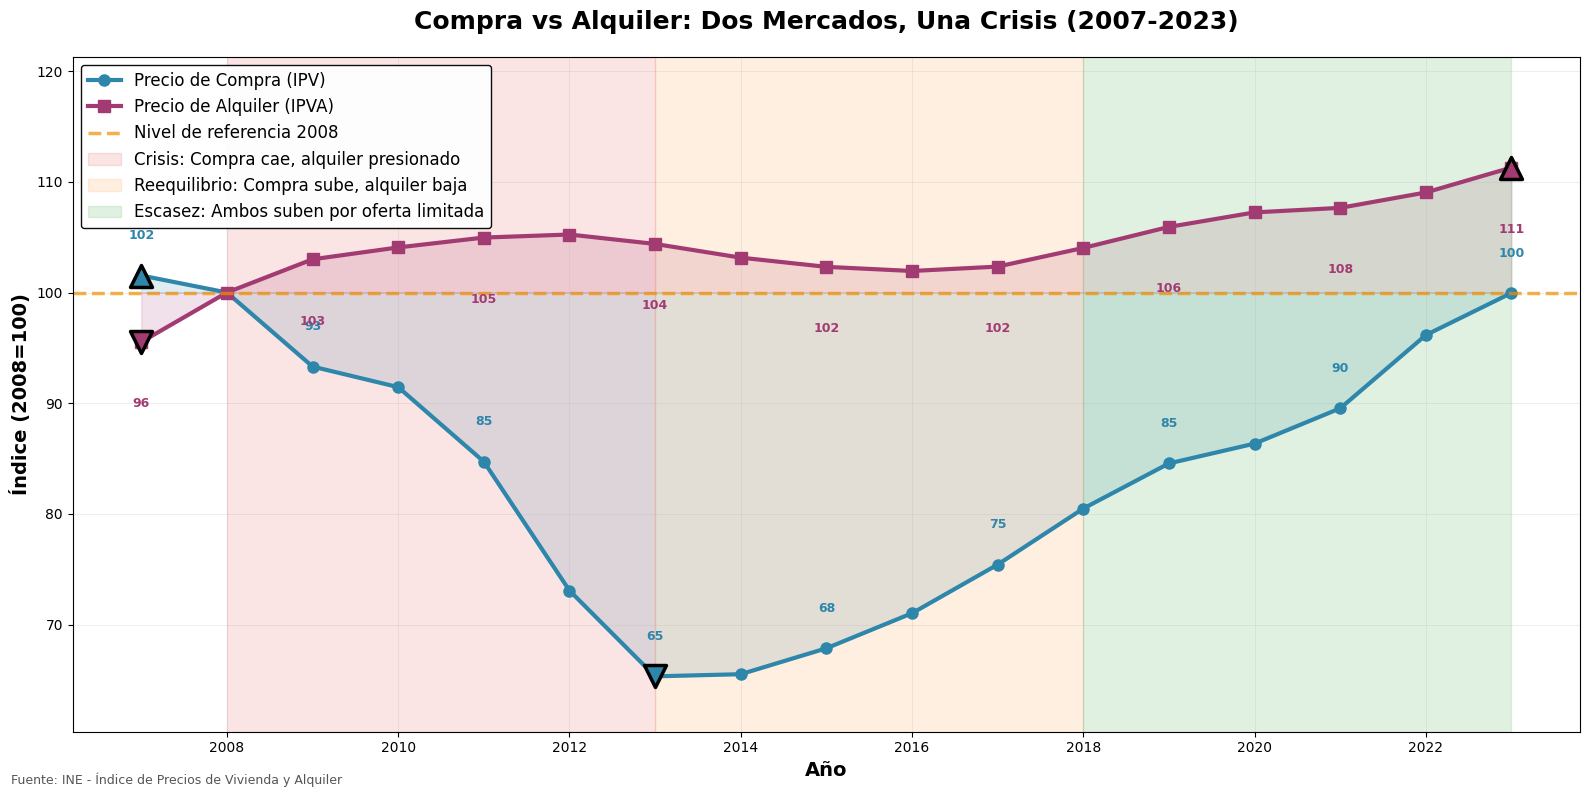


📊 ANÁLISIS: COMPRA VS ALQUILER - LA VÁLVULA DE PRESIÓN

💰 PRECIO DE COMPRA (IPV):
   • Inicial (2007): 101.5
   • Mínimo: 65.3 en 2013
   • Máximo: 101.5 en 2007
   • Actual (2023): 100.0
   • Variación total: -1.5%

🏠 PRECIO DE ALQUILER (IPVA):
   • Inicial (2007): 95.5
   • Mínimo: 95.5 en 2007
   • Máximo: 111.3 en 2023
   • Actual (2023): 111.3
   • Variación total: +16.5%

🔄 DIVERGENCIA ENTRE MERCADOS:
   • Diferencia inicial (2007): 6.0 puntos por debajo el alquiler
   • Diferencia actual (2023): 11.3 puntos por encima el alquiler
   • Cambio en divergencia: +17.3 puntos

📈 COMPORTAMIENTO POR FASES:
   • Fase Crisis (2008-2014): Refugio en alquiler
     → Compra: -34.5% (caída fuerte)
     → Alquiler: +3.1% (resistencia relativa)
     → Cuando la compra se hunde, la gente se refugia en alquiler
   • Fase Reequilibrio (2014-2018): Compra rebota, alquiler corrige
     → Compra: +22.8% (rebote desde mínimos)
     → Alquiler: +0.9% (ligera relajación)
     → Se cierra la válvula: la

In [18]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar datos procesados
df = pd.read_csv("../data_clean/mercado_vivienda_procesado.csv", sep=";", encoding="utf-8")

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(16, 8))

# Gráfico de líneas con áreas sombreadas
ax.plot(df["Año"], df["ipv"], marker='o', linewidth=3, color='#2E86AB', markersize=8, label='Precio de Compra (IPV)')
ax.plot(df["Año"], df["ipva"], marker='s', linewidth=3, color='#A23B72', markersize=8, label='Precio de Alquiler (IPVA)')

ax.fill_between(df["Año"], df["ipv"], 100, alpha=0.15, color='#2E86AB')
ax.fill_between(df["Año"], df["ipva"], 100, alpha=0.15, color='#A23B72')

# Línea de referencia (año 2008)
ax.axhline(y=100, color='#F18F01', linestyle='--', linewidth=2.5, alpha=0.7, label='Nivel de referencia 2008')

# Resaltar zonas críticas
ax.axvspan(2008, 2013, alpha=0.12, color='#d62728', label='Crisis: Compra cae, alquiler presionado')
ax.axvspan(2013, 2018, alpha=0.12, color='#FF7F0E', label='Reequilibrio: Compra sube, alquiler baja')
ax.axvspan(2018, 2023, alpha=0.14, color='#2CA02C', label='Escasez: Ambos suben por oferta limitada')

# Estilos
ax.set_title("Compra vs Alquiler: Dos Mercados, Una Crisis (2007-2023)", 
             fontsize=18, fontweight='bold', pad=20)
ax.set_ylabel("Índice (2008=100)", fontsize=14, fontweight='bold')
ax.set_xlabel("Año", fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.legend(fontsize=12, loc='upper left', framealpha=0.95, edgecolor='black')
ax.set_ylim(min(df[["ipv", "ipva"]].min()) - 5, max(df[["ipv", "ipva"]].max()) + 10)

# Añadir valores en los puntos clave
for i, (year, value_ipv, value_ipva) in enumerate(zip(df["Año"], df["ipv"], df["ipva"])):
    if i % 2 == 0:  # Mostrar etiquetas cada 2 años
        ax.text(year, value_ipv + 3, f'{value_ipv:.0f}', ha='center', va='bottom', 
                fontsize=9, fontweight='bold', color='#2E86AB')
        ax.text(year, value_ipva - 5, f'{value_ipva:.0f}', ha='center', va='top', 
                fontsize=9, fontweight='bold', color='#A23B72')

# Marcar puntos clave para IPV
año_minimo_ipv_idx = df['ipv'].idxmin()
año_maximo_ipv_idx = df['ipv'].idxmax()
ax.scatter(df.loc[año_minimo_ipv_idx, 'Año'], df.loc[año_minimo_ipv_idx, 'ipv'], 
          color='#2E86AB', s=250, zorder=5, edgecolor='black', linewidth=2.5, marker='v')
ax.scatter(df.loc[año_maximo_ipv_idx, 'Año'], df.loc[año_maximo_ipv_idx, 'ipv'], 
          color='#2E86AB', s=250, zorder=5, edgecolor='black', linewidth=2.5, marker='^')

# Marcar puntos clave para IPVA
año_minimo_ipva_idx = df['ipva'].idxmin()
año_maximo_ipva_idx = df['ipva'].idxmax()
ax.scatter(df.loc[año_minimo_ipva_idx, 'Año'], df.loc[año_minimo_ipva_idx, 'ipva'], 
          color='#A23B72', s=250, zorder=5, edgecolor='black', linewidth=2.5, marker='v')
ax.scatter(df.loc[año_maximo_ipva_idx, 'Año'], df.loc[año_maximo_ipva_idx, 'ipva'], 
          color='#A23B72', s=250, zorder=5, edgecolor='black', linewidth=2.5, marker='^')

# Añadir la fuente del dato
fig.text(0.01, 0.01,
         "Fuente: INE - Índice de Precios de Vivienda y Alquiler",
         fontsize=9, ha='left', va='bottom', color='#555555')

# Ajuste de márgenes
plt.subplots_adjust(left=0.08, right=0.95, top=0.93, bottom=0.10)

plt.tight_layout()
plt.show()

# Guardar figura
fig.savefig("../outputs/figures/compra_vs_alquiler.png", dpi=300)

# Análisis e interpretaciones
print("\n" + "="*70)
print("📊 ANÁLISIS: COMPRA VS ALQUILER - LA VÁLVULA DE PRESIÓN")
print("="*70)

# Estadísticas clave IPV
año_minimo_ipv = df.loc[df['ipv'].idxmin()]
año_maximo_ipv = df.loc[df['ipv'].idxmax()]
valor_actual_ipv = df['ipv'].iloc[0]
valor_inicial_ipv = df['ipv'].iloc[-1]

# Estadísticas clave IPVA
año_minimo_ipva = df.loc[df['ipva'].idxmin()]
año_maximo_ipva = df.loc[df['ipva'].idxmax()]
valor_actual_ipva = df['ipva'].iloc[0]
valor_inicial_ipva = df['ipva'].iloc[-1]

print(f"\n💰 PRECIO DE COMPRA (IPV):")
print(f"   • Inicial (2007): {valor_inicial_ipv:.1f}")
print(f"   • Mínimo: {año_minimo_ipv['ipv']:.1f} en {int(año_minimo_ipv['Año'])}")
print(f"   • Máximo: {año_maximo_ipv['ipv']:.1f} en {int(año_maximo_ipv['Año'])}")
print(f"   • Actual (2023): {valor_actual_ipv:.1f}")
print(f"   • Variación total: {((valor_actual_ipv/valor_inicial_ipv)-1)*100:+.1f}%")

print(f"\n🏠 PRECIO DE ALQUILER (IPVA):")
print(f"   • Inicial (2007): {valor_inicial_ipva:.1f}")
print(f"   • Mínimo: {año_minimo_ipva['ipva']:.1f} en {int(año_minimo_ipva['Año'])}")
print(f"   • Máximo: {año_maximo_ipva['ipva']:.1f} en {int(año_maximo_ipva['Año'])}")
print(f"   • Actual (2023): {valor_actual_ipva:.1f}")
print(f"   • Variación total: {((valor_actual_ipva/valor_inicial_ipva)-1)*100:+.1f}%")

print(f"\n🔄 DIVERGENCIA ENTRE MERCADOS:")
divergencia_inicial = (valor_inicial_ipv - valor_inicial_ipva)
divergencia_actual = (valor_actual_ipv - valor_actual_ipva)
print(f"   • Diferencia inicial (2007): {abs(divergencia_inicial):.1f} puntos por debajo el alquiler")
print(f"   • Diferencia actual (2023): {abs(divergencia_actual):.1f} puntos por encima el alquiler")
print(f"   • Cambio en divergencia: {(divergencia_inicial - divergencia_actual):+.1f} puntos")

print(f"\n📈 COMPORTAMIENTO POR FASES:")
precio_ipv_2008 = df[df['Año'] == 2008]['ipv'].values[0] if 2008 in df['Año'].values else None
precio_ipva_2008 = df[df['Año'] == 2008]['ipva'].values[0] if 2008 in df['Año'].values else None
precio_ipv_2014 = df[df['Año'] == 2014]['ipv'].values[0] if 2014 in df['Año'].values else None
precio_ipva_2014 = df[df['Año'] == 2014]['ipva'].values[0] if 2014 in df['Año'].values else None
precio_ipv_2018 = df[df['Año'] == 2018]['ipv'].values[0] if 2018 in df['Año'].values else None
precio_ipva_2018 = df[df['Año'] == 2018]['ipva'].values[0] if 2018 in df['Año'].values else None

# Fase 1: Crisis (2008-2014)
if precio_ipv_2008 and precio_ipv_2014 and precio_ipva_2008 and precio_ipva_2014:
    caida_compra = ((precio_ipv_2014/precio_ipv_2008)-1)*100
    caida_alquiler = ((precio_ipva_2014/precio_ipva_2008)-1)*100
    print(f"   • Fase Crisis (2008-2014): Refugio en alquiler")
    print(f"     → Compra: {caida_compra:.1f}% (caída fuerte)")
    print(f"     → Alquiler: {caida_alquiler:+.1f}% (resistencia relativa)")
    print(f"     → Cuando la compra se hunde, la gente se refugia en alquiler")

# Fase 2: Reequilibrio inverso (2014-2018): compra sube, alquiler baja
if precio_ipv_2014 and precio_ipv_2018 and precio_ipva_2014 and precio_ipva_2018:
    subida_compra = ((precio_ipv_2018/precio_ipv_2014)-1)*100
    bajada_alquiler = ((precio_ipva_2018/precio_ipva_2014)-1)*100
    print(f"   • Fase Reequilibrio (2014-2018): Compra rebota, alquiler corrige")
    print(f"     → Compra: {subida_compra:+.1f}% (rebote desde mínimos)")
    print(f"     → Alquiler: {bajada_alquiler:+.1f}% (ligera relajación)")
    print(f"     → Se cierra la válvula: la compra mejora mientras el alquiler afloja")

# Fase 3: Escasez de oferta (2018-2023): ambos vuelven a subir
if precio_ipv_2018 and precio_ipva_2018:
    subida_compra_final = ((valor_actual_ipv/precio_ipv_2018)-1)*100
    subida_alquiler_final = ((valor_actual_ipva/precio_ipva_2018)-1)*100
    print(f"   • Fase Escasez (2018-2023): Oferta corta, ambos se encarecen")
    print(f"     → Compra: {subida_compra_final:+.1f}%" "(continua su ascenso)") 
    print(f"     → Alquiler: {subida_alquiler_final:+.1f}% (vuelve a acelerarse)")
    print(f"     → La oferta limitada presiona ambos mercados al alza")

print(f"\n⚠️  INTERPRETACIÓN - LA VÁLVULA DE PRESIÓN:")
print(f"   ✓ Crisis (2008-2014): Compra se hunde → refugio en alquiler")
print(f"   ✓ Reequilibrio (2014-2018): La compra rebota, el alquiler cede algo")
print(f"   ✓ Escasez (2018-2023): Ambos suben por oferta insuficiente; el alquiler acelera")
print(f"   ✓ La tensión regresa: sin válvula de escape, acceso bloqueado")

print(f"\n🎯 CONCLUSIÓN CLAVE:")
print(f"   >>> El alquiler se convierte en el precio 'real' del acceso a la vivienda")
print(f"   >>> Ya no es una opción temporal o flexible")
print(f"   >>> Es la única puerta de entrada (y está cerrada para muchos)")

print("\n" + "="*70 + "\n")

## 📊 8. Alquiler vs salario real

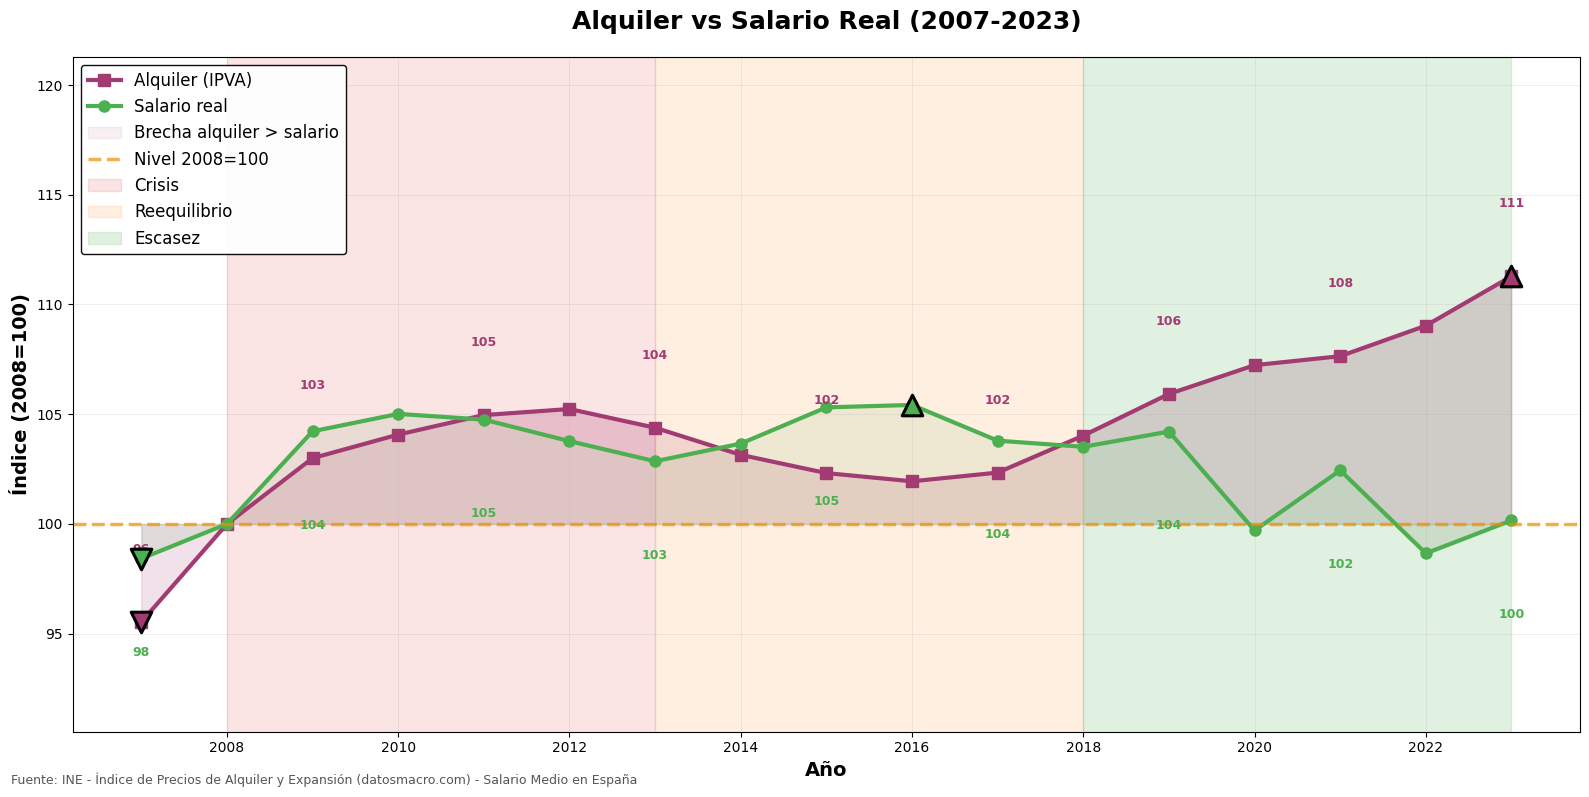


📊 ANÁLISIS: ALQUILER VS SALARIO REAL

🏠 Alquiler (IPVA): 95.5 → 111.3 (+16.5%)
💼 Salario real:     98.4 → 100.2 (+1.8%)

🔄 Brecha alquiler - salario:
   • 2007: +2.9 puntos por debajo el salario
   • 2023: +11.1 puntos por encima del salario
   • Cambio de brecha: +14.0 puntos

• Hasta 2018: Alquiler y salario se mantienen casi planos.
  → Alquiler: +0.9% | Salario real: -0.1%
• Desde 2018: Alquiler se dispara, salario se estanca o cae.
  → Alquiler: +7.0% | Salario real: -3.2%
  → El alquiler absorbe más renta mientras el salario no crece e incluso se retrae

⚠️ Conclusión:
   El alquiler se convierte en el precio 'real' del acceso a la vivienda: sube más rápido que el salario real.

📌 Titular:
   El alquiler absorbe una parte creciente del salario aunque el trabajador no sea más rico.

Esto explica:
   • Retraso en la emancipación
   • Hacinamiento
   • Familias volviendo a vivir juntas




In [19]:
## Crear figura y ejes
fig, ax = plt.subplots(figsize=(16, 8))

# Líneas
ax.plot(df["Año"], df["ipva"], marker='s', linewidth=3, color='#A23B72', markersize=8, label='Alquiler (IPVA)')
ax.plot(df["Año"], df["salario_real"], marker='o', linewidth=3, color='#4CAF50', markersize=8, label='Salario real')

# Áreas respecto a 2008=100
ax.fill_between(df["Año"], df["ipva"], 100, alpha=0.15, color='#A23B72')
ax.fill_between(df["Año"], df["salario_real"], 100, alpha=0.10, color='#4CAF50')

# Brecha alquiler – salario
ax.fill_between(df["Año"], df["ipva"], df["salario_real"],
                where=df["ipva"] > df["salario_real"],
                color='#A23B72', alpha=0.08, label='Brecha alquiler > salario')

# Línea de referencia
ax.axhline(y=100, color='#F18F01', linestyle='--', linewidth=2.5, alpha=0.7, label='Nivel 2008=100')

# Zonas
ax.axvspan(2008, 2013, alpha=0.12, color='#d62728', label='Crisis')
ax.axvspan(2013, 2018, alpha=0.12, color='#FF7F0E', label='Reequilibrio')
ax.axvspan(2018, 2023, alpha=0.14, color='#2CA02C', label='Escasez')

# Estilo
ax.set_title("Alquiler vs Salario Real (2007-2023)", fontsize=18, fontweight='bold', pad=20)
ax.set_ylabel("Índice (2008=100)", fontsize=14, fontweight='bold')
ax.set_xlabel("Año", fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.legend(fontsize=12, loc='upper left', framealpha=0.95, edgecolor='black')
ax.set_ylim(min(df[["ipva", "salario_real"]].min()) - 5, max(df[["ipva", "salario_real"]].max()) + 10)

# Etiquetas cada 2 años
for i, (year, v_ipva, v_sal) in enumerate(zip(df["Año"], df["ipva"], df["salario_real"])):
    if i % 2 == 0:
        ax.text(year, v_ipva + 3, f'{v_ipva:.0f}', ha='center', va='bottom',
                fontsize=9, fontweight='bold', color='#A23B72')
        ax.text(year, v_sal - 4, f'{v_sal:.0f}', ha='center', va='top',
                fontsize=9, fontweight='bold', color='#4CAF50')

# Puntos clave
ipva_min_idx, ipva_max_idx = df['ipva'].idxmin(), df['ipva'].idxmax()
sal_min_idx, sal_max_idx = df['salario_real'].idxmin(), df['salario_real'].idxmax()

ax.scatter(df.loc[ipva_min_idx, 'Año'], df.loc[ipva_min_idx, 'ipva'],
           color='#A23B72', s=220, zorder=5, edgecolor='black', linewidth=2.2, marker='v')
ax.scatter(df.loc[ipva_max_idx, 'Año'], df.loc[ipva_max_idx, 'ipva'],
           color='#A23B72', s=220, zorder=5, edgecolor='black', linewidth=2.2, marker='^')

ax.scatter(df.loc[sal_min_idx, 'Año'], df.loc[sal_min_idx, 'salario_real'],
           color='#4CAF50', s=220, zorder=5, edgecolor='black', linewidth=2.2, marker='v')
ax.scatter(df.loc[sal_max_idx, 'Año'], df.loc[sal_max_idx, 'salario_real'],
           color='#4CAF50', s=220, zorder=5, edgecolor='black', linewidth=2.2, marker='^')

# Añadir la fuente del dato
fig.text(0.01, 0.01,
         "Fuente: INE - Índice de Precios de Alquiler y Expansión (datosmacro.com) - Salario Medio en España",
         fontsize=9, ha='left', va='bottom', color='#555555')

plt.subplots_adjust(left=0.08, right=0.95, top=0.93, bottom=0.10)

plt.tight_layout()
plt.show()

# Guardar figura
fig.savefig("../outputs/figures/alquiler_vs_salario.png", dpi=300)

# Análisis e interpretación
print("\n" + "="*70)
print("📊 ANÁLISIS: ALQUILER VS SALARIO REAL")
print("="*70)

# Estadísticas clave
valor_inicial_ipva = df['ipva'].iloc[-1]
valor_actual_ipva = df['ipva'].iloc[0]
valor_inicial_sal = df['salario_real'].iloc[-1]
valor_actual_sal = df['salario_real'].iloc[0]

print(f"\n🏠 Alquiler (IPVA): {valor_inicial_ipva:.1f} → {valor_actual_ipva:.1f} ({((valor_actual_ipva/valor_inicial_ipva)-1)*100:+.1f}%)")
print(f"💼 Salario real:     {valor_inicial_sal:.1f} → {valor_actual_sal:.1f} ({((valor_actual_sal/valor_inicial_sal)-1)*100:+.1f}%)")

brecha_inicial = valor_inicial_ipva - valor_inicial_sal
brecha_actual = valor_actual_ipva - valor_actual_sal
print(f"\n🔄 Brecha alquiler - salario:")
print(f"   • 2007: {abs(brecha_inicial):+.1f} puntos por debajo el salario")
print(f"   • 2023: {brecha_actual:+.1f} puntos por encima del salario")
print(f"   • Cambio de brecha: {brecha_actual - brecha_inicial:+.1f} puntos")

# Fases (dos tramos: hasta 2018 estable, desde 2018 se abre la brecha)
precio_ipva_2014 = df[df['Año'] == 2014]['ipva'].values[0] if 2014 in df['Año'].values else None
salario_2014 = df[df['Año'] == 2014]['salario_real'].values[0] if 2014 in df['Año'].values else None
precio_ipva_2018 = df[df['Año'] == 2018]['ipva'].values[0] if 2018 in df['Año'].values else None
salario_2018 = df[df['Año'] == 2018]['salario_real'].values[0] if 2018 in df['Año'].values else None

if precio_ipva_2014 and salario_2014 and precio_ipva_2018 and salario_2018:
    crec_ipva_14_18 = ((precio_ipva_2018/precio_ipva_2014)-1)*100
    crec_sal_14_18 = ((salario_2018/salario_2014)-1)*100
    print(f"\n• Hasta 2018: Alquiler y salario se mantienen casi planos.")
    print(f"  → Alquiler: {crec_ipva_14_18:+.1f}% | Salario real: {crec_sal_14_18:+.1f}%")
if precio_ipva_2018 and salario_2018:
    crec_ipva_18_23 = ((valor_actual_ipva/precio_ipva_2018)-1)*100
    crec_sal_18_23 = ((valor_actual_sal/salario_2018)-1)*100
    print(f"• Desde 2018: Alquiler se dispara, salario se estanca o cae.")
    print(f"  → Alquiler: {crec_ipva_18_23:+.1f}% | Salario real: {crec_sal_18_23:+.1f}%")
    print(f"  → El alquiler absorbe más renta mientras el salario no crece e incluso se retrae")

print(f"\n⚠️ Conclusión:")
print(f"   El alquiler se convierte en el precio 'real' del acceso a la vivienda: sube más rápido que el salario real.")
print(f"\n📌 Titular:")
print(f"   El alquiler absorbe una parte creciente del salario aunque el trabajador no sea más rico.")
print(f"\nEsto explica:")
print(f"   • Retraso en la emancipación")
print(f"   • Hacinamiento")
print(f"   • Familias volviendo a vivir juntas")
print("\n" + "="*70 + "\n")